### Topics
- Topics or themes are a group of statistically significant “tokens” or words in a “corpus”.


### Topic Modelling
- Topic modeling is is an unsupervised learning process of automatically finding the hidden topics in textual data. It is also referred to as the text or information mining technique that has the aim to find the recurring patterns in the words present in the corpus.

 ### Latent Dirichlet Allocation (LDA)

### Lets assume 5 documents

In [ ]:
doc1 = "I want to watch a movie this weekend."
doc2 = "I went shopping yesterday. New Zealand won the World Test Championship by beating India."
doc3 = "I don’t watch cricket. Netflix and Amazon Prime have very good movies to watch."
doc4 = "Movies are a nice way to chill however, this time I would like to paint and read some good books."
doc5 = "Awaken the Gaint is so good! Try reading Tony Robbin’s books."

In [ ]:
corpus = [doc1,doc2,doc3,doc4,doc5]

Document Term Matrix willbe as below

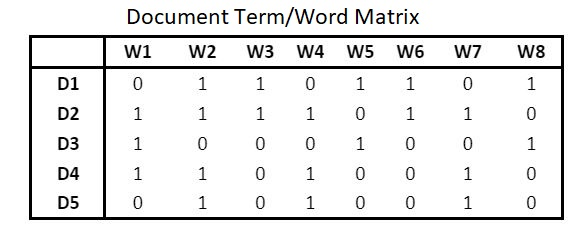

LDA converts this document-word matrix into two other matrices: Document Term matrix and Topic Word matrix as shown below:

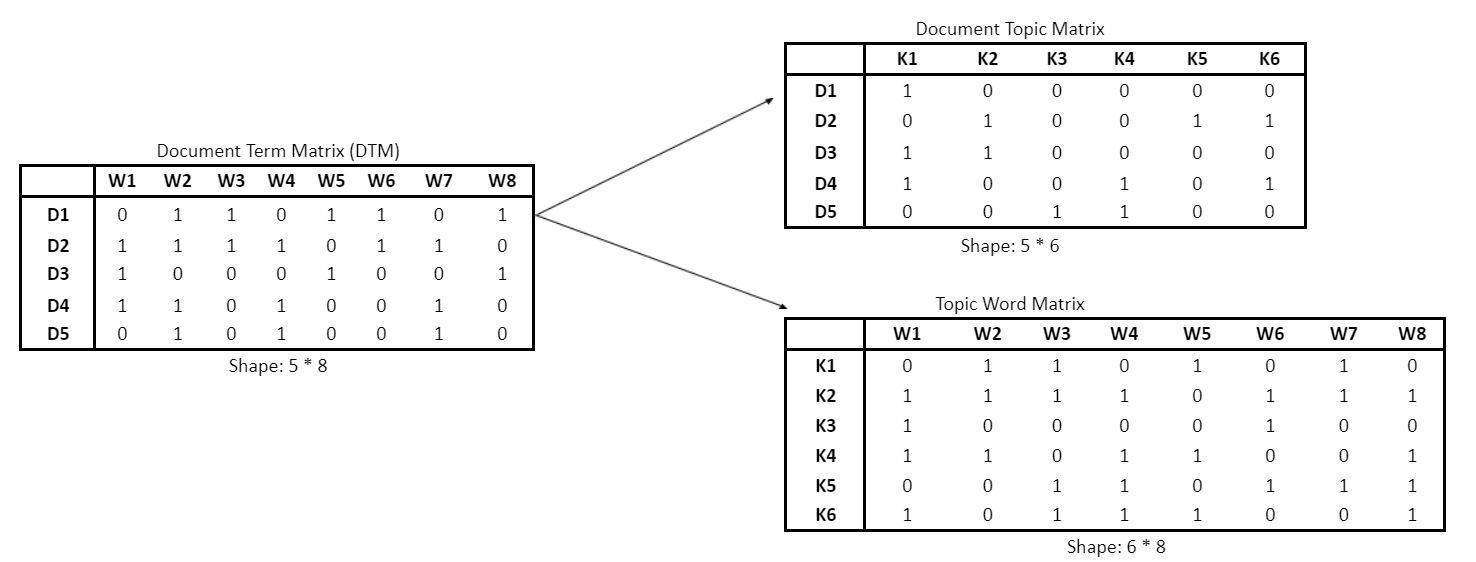

- The Document-Topic matrix already contains the possible topics (represented by K above) that the documents can contain. Here, suppose we have 6 topics and had 5 documents so the matrix is of dimension 5*6
- The Topic-Word matrix has the words (or terms) that those topics can contain. We have 6 topics and 8 unique tokens in the vocabulary hence the matrix had a shape of 6*8.

The LDA makes two assumptions:
- Documents are a mixture of topics, and
- Topics are a mixture of tokens (or words)

Now, our corpus that had 5 documents (D1 to D5) and with their respective number of words:
- D1 = (w1, w2, w3, w4, w5, w6, w7, w8)
- D2 = (w'1, w'2, w'3, w'4, w'5, w'6, w'7, w'8, w'9, w'10)
- D3 = (w"1, w"2, w"3, w"4, w"5, w"6, w"7, w"8, w"9, w"10, w"11, w"12, w"13, w"14 w"15)
- D4 = (w"'1, w"'2, w"'3, w"'4, w"'5, w"'6, w"'7, w"'8, w"'9, w"'10, w"'11, w"'12)
- D5 = (w““1, w““2, w““3, w““4, w““5, w““6, w““7, w““8, w““9, w““10,…, w““32, w““33, w““34)

#### LDA is an iterative process
The first iteration of LDA:
In the first iteration, it randomly assigns the topics to each word in the document. The topics are represented by the letter k. So, in our corpus, the words in the documents will be associated with some random topics like below:

- D1 = (w1 (k5), w2 (k3), w3 (k1), w4 (k2), w5 (k5), w6 (k4), w7 (k7), w8(k1))
- D2 = (w'1(k2), w'2 (k4), w'3 (k2), w'4 (k1), w'5 (k2), w'6 (k1), w'7 (k5), w'8(k3), w'9 (k7), w'10(k1))
- D3 = (w“1(k3), w“2 (k1), w“3 (k5), w“4 (k3), w“5 (k4), w“6(k1),…, w“13 (k1), w“14(k3), w“15 (k2))
- D4 = (w“'1(k4), w“'2 (k5), w“'3 (k3), w“'4 (k6), w“'5 (k5), w“'6 (k3) …, w“'10 (k3), w“'11 (k7), w“'12 (k1))
- D5 = (w““1 (k1), w““2 (k7), w““3 (k2), w““4 (k8), w““5 (k1), w““6(k8) …, w““32(k3), w““33(k6), w““34 (k5))

The documents are the mixture of the topics:

- D1 = k5 + k3 + k1 + k2 + k5 + k4 + k7+ k1
- D2 = k2 + k4 + k2 + k1 + k5 + k2 + k1+ k5 + k3 + k7 + k1
- D3 = k4 + k5 + k3 + k6 + k5 + k3 + … + k3+ k7 + k1
- D3 = k1 + k7 + k2 + k8 + k1 + k8 + … + k3+ k6 + k5

The topics are the mixture of the words:
- K1 = w3 + w8 + w'4 + w'6 + w’10 + w“2 + w“6 + … + w“13 + w“'12 + w““1 + w““5
- K2 = w4 + w'1 + w'3 + w“15 + …. + w““3 + …
- K3 = w2 + w’8 + w“1 + w“4 + w“14 + w“'3 + w“'6 + … + w“'10 + w““32 + …
- Similarly, LDA will give the word combinations for other topics.

LDA will iterate over: each document ‘D’ and each word ‘w’
and  tries to correct and adjust the topic assignment of the current word with a new assignment.
It does so by computing two probabilities: p1 and p2 for every topic (k) and word where:

- P1: proportion of words in the document (D) that are currently assigned to the topic (k)
- P2: is the proportion of assignments to the topic(k) over all documents that come from this word w.

The formula for p1 and p2 is:

- P1 = proportion (words assigned with topic k in document D / total words in document D)
- P2 = proportion (documents assigned with topic k for word w / all the documents with word w)

Now, using these probabilities p1 and p2, LDA estimates a new probability for every word and every topic, which is the product of (p1*p2).  Whichever topic has highest probability, LDA identifies that as new topic, or the most relevant topic for the current word.

Reassignment of word ‘w’ of the document ‘D’ to a new topic ‘k’ via the product probability of p1 * p2

This process of choosing the new topic ‘k’ is done for many iterations until a steady-state is obtained. The convergence point of LDA is obtained where it gives the most optimized representation of the document-term matrix and topic-word matrix.

In [ ]:
import gensim
from nltk.corpus import stopwords
from nltk import ngrams
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re
import string 
from gensim.models.coherencemodel import CoherenceModel

In [ ]:
import pandas as pd
data = pd.read_csv('bbc-text.csv')

In [ ]:
from gensim.matutils import cossim
doc0 = lda_model.get_document_topics(doc_term_matrix[0], minimum_probability=0)
doc1 = lda_model.get_document_topics(doc_term_matrix[2], minimum_probability=0)
doc2 = lda_model.get_document_topics(doc_term_matrix[3], minimum_probability=0)

doc0_topic = data.loc[0,'category']
doc1_topic = data.loc[2,'category']
doc2_topic = data.loc[3,'category']

print('doc0 belongs to '+ doc0_topic+ '\ndoc1 belongs to '+ doc1_topic+'\ncosine similarity between doc0 and doc1 is : '+ str(cossim(doc0, doc1)))
# print(cossim(doc1, doc2))
print()
print('doc1 belongs to '+ doc1_topic+ '\ndoc2 belongs to '+ doc2_topic+'\ncosine similarity between doc1 and doc2 is : '+ str(cossim(doc2, doc1)))
# print(cossim(doc1, doc2))